<a href="https://colab.research.google.com/github/vhrique/anne_ptbr/blob/main/02a_Funcoes_Perda_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funções de Perda em Redes Neurais Artificiais

Entre os paradigmas de aprendizagem mais relevantes está a aprendizagem supervisionada, que será o foco desta aula.

Na aprendizagem supervisionada, o modelo é treinado utilizando um conjunto de dados rotulados, ou seja, para cada entrada, há uma saída esperada conhecida.
O objetivo do modelo é aprender uma função que mapeia as entradas para as saídas corretas, generalizando esse conhecimento para prever novas amostras.
Esse paradigma é amplamente aplicado em tarefas de classificação e regressão.

Dependendo do tipo de tarefa, diferentes funções de perda podem ser utilizadas.
Vejamos algumas destas funções a partir de dois exemplos, um de classificação e outro de regressão.

## Classificação

Na classificação, o modelo aprende a categorizar entradas em uma ou mais classes.
Um exemplo clássico é o Iris Dataset de Fisher (1936), onde tamanhos de pétala e sépala são utilizados para classificar entre três tipos diferentes de flor Iris.
Com isto, o modelo aprende a identificar padrões que distinguem uma classe de outra.

Para tarefas de classificação, costumamos utilizar funções de perda com base em entropia cruzada, que nos ajudam a calcular erros em saídas categóricas.


### Cross-Entropy como Função de Perda em Redes Neurais

A entropia cruzada (cross-entropy) tem suas origens na teoria da informação, desenvolvida por Claude Shannon na década de 1940.
A ideia central da teoria da informação é quantificar a quantidade de informação ou incerteza presente em um conjunto de dados, e a entropia é uma medida dessa incerteza.
A entropia de Shannon mede o grau de imprevisibilidade de um sistema de eventos, sendo usada para descrever a incerteza associada a uma distribuição de probabilidades.

A fórmula da entropia de Shannon é dada por:

$$
H(P) = - \sum_{i=1}^{C}P(i).log(P(i))
$$

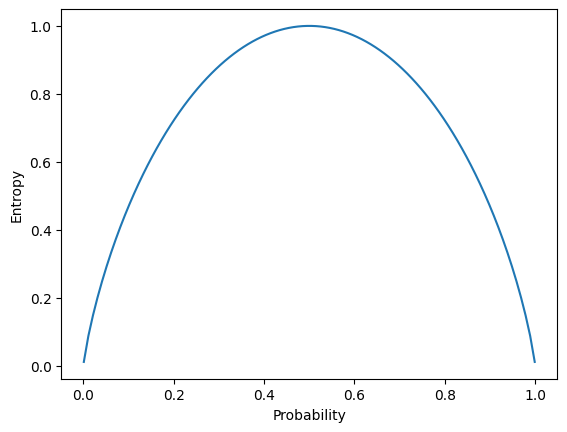

In [ ]:
probabilities = torch.linspace(0.001,0.999,100)

entropy = [(-prob * torch.log2(prob)) - ((1-prob) * torch.log2(1 - prob)) for prob in probabilities]

plt.plot(probabilities, entropy)

plt.ylabel('Entropy')
plt.xlabel('Probability')

plt.show()

No contexto de redes neurais, a entropia cruzada é uma medida da divergência entre duas distribuições de probabilidade: a distribuição verdadeira dos rótulos (a saída correta) e a distribuição prevista pelo modelo.
No caso de uma rede neural, $P$ é a distribuição verdadeira dos rótulos (normalmente representada por um vetor one-hot) e $Q$ é a distribuição de probabilidade prevista pelo modelo.

A fórmula da entropia cruzada é dada por:

$$
H(P,Q) = - \sum_{i=1}^{C}P(i).log(Q(i))
$$

Onde:

- $P(i)$, ou $y_i$ é a probabilidade verdadeira para a classe $i$ (em problemas de classificação, geralmente usamos  0 ou 1).
- $Q(i)$, ou $\hat{y}_i$, é a probabilidade prevista pelo modelo para a classe $i$.

A entropia cruzada mede o quão bem o modelo está capturando a distribuição verdadeira dos rótulos.
Quando $P(i)$ é 1 (ou seja, a classe $𝑖$ é a correta), a entropia cruzada penaliza o modelo se a probabilidade $𝑄(i)$ não estiver próxima de 1.

### Classificação Binária

Na classificação binária, o modelo tem que decidir entre duas classes possíveis.
Por exemplo, um modelo pode classificar e-mails como "spam" ou "não spam". As saídas são representadas por um único valor, geralmente 0 ou 1, onde 0 pode significar "classe negativa" e 1 "classe positiva".
A função de ativação mais comum usada para esse tipo de problema é a sigmoide, que gera uma probabilidade entre 0 e 1.
A função de perda mais utilizada é a Binary Cross-Entropy (BCE).
Porém, também pode ser utilizadas outras funções.

#### Binary Cross-Entropy

A Binary Cross-Entropy (BCE) é comumente usada em problemas de classificação binária, onde o objetivo é prever se uma amostra pertence a uma de duas classes.
Essa função mede a diferença entre a probabilidade prevista e o valor real, penalizando fortemente predições erradas. A fórmula é:

$$
\text{BCE} = - \frac{1}{N}\sum_{i=1}^{N}\left[y_i.log(\hat{y}_i) + (1 - y_i).log(1-\hat{y}_i)\right]
$$

Aqui, $y_i$ é o valor real (0 ou 1) e $\hat{y}_i$ é a probabilidade prevista.
O objetivo é minimizar essa diferença, fazendo com que a probabilidade prevista se aproxime do valor real.

- Vantagem: Funciona muito bem com problemas binários, lidando com probabilidades.
- Desvantagem: Pode ser mais sensível a problemas de balanço de classes.

A célula abaixo mostra como utilizar esta função de perda, além de plotar o resultado desta função para diferentes saídas $\hat{y}_i$ e valores reais $y_i$.

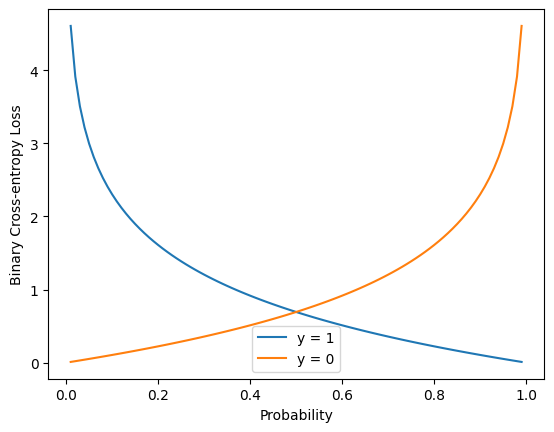

In [ ]:
probabilities = torch.linspace(0.01,0.99,99)
ones = torch.ones_like(probabilities)
zeros = torch.zeros_like(probabilities)

criterion = torch.nn.BCELoss()

positive = [criterion(probabilities[i], ones[i]) for i in range(len(ones))]
negative = [criterion(probabilities[i], zeros[i]) for i in range(len(zeros))]

plt.plot(probabilities, positive)
plt.plot(probabilities, negative)

plt.legend(['y = 1', 'y = 0'])
plt.ylabel('Binary Cross-entropy Loss')
plt.xlabel('Probability')

plt.show()

### Classificação Multiclasse

Na classificação multiclasse, o modelo precisa classificar as entradas em mais de duas classes mutuamente exclusivas.
Um exemplo clássico é a classificação de imagens de dígitos escritos à mão, onde cada dígito (0 a 9) é uma classe diferente.
Nesse caso, o modelo produz uma única saída que corresponde a uma das classes.
A função de ativação comumente usada para multiclasse é a _softmax_, que normaliza as saídas para que elas somem 1, permitindo a interpretação dessas saídas como probabilidades.
A função de perda mais comum é a Categorical Cross-Entropy (entropia cruzada categórica).

#### Categorical Cross-Entropy

A Entropia Cruzada Categórica é usada em problemas de classificação multiclasse, onde o objetivo é prever uma entre várias classes mutuamente exclusivas.
A fórmula é:

$$
\text{CCE} = - \frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{C}y_{ij}.log(\hat{y}_{ij})
$$

Aqui, $C$ é o número de classes, $y_{ij}$ é o valor real (geralmente um vetor one-hot) e $\hat{y}_{ij}$ é a probabilidade prevista para a classe $j$.
A _softmax_ é usada como função de ativação na saída, convertendo as predições em probabilidades.

- Vantagem: Adequada para problemas com várias classes exclusivas.
- Desvantagem: Não lida bem com situações em que uma instância pode pertencer a múltiplas classes.

Chamamos esta função em Pytorch da seguinte forma:

In [ ]:
criterion = torch.nn.CrossEntropyLoss()

### Classificação Multilabel

Na classificação multilabel, cada entrada pode pertencer simultaneamente a várias classes, ou seja, as classes não são mutuamente exclusivas.
Por exemplo, um sistema de recomendação de filmes pode classificar um filme tanto como "comédia" quanto "drama", ou uma imagem pode conter vários objetos diferentes, como "gato", "carro" e "árvore".
Nesse caso, o modelo produz várias saídas, uma para cada possível classe, e cada saída é tratada como um problema de classificação binária (ou seja, uma classe pode estar presente ou não).
Aqui, a sigmoide é usada em cada saída, com a função de perda Binary Cross-Entropy aplicada individualmente para cada classe.

#### Multilabel Binary Cross-Entropy

Em problemas de classificação multilabel, onde uma entrada pode pertencer a mais de uma classe, a Multilabel Binary Cross-Entropy é utilizada.
É basicamente a BCE aplicada a cada rótulo individualmente.
A fórmula é semelhante à da BCE, mas ajustada para várias saídas simultâneas.

- Vantagem: Adequada para problemas onde uma entrada pertence a múltiplas classes.
- Desvantagem: Pode se tornar ineficiente com um grande número de classes.

### Margin (Hinge)

O Hinge Loss é usado com máquinas de vetores de suporte (SVMs), mas também pode ser aplicado em redes neurais para problemas de classificação binária.
Ele força o modelo a maximizar a margem entre as classes, penalizando erros de classificação de forma mais agressiva.

A fórmula para um problema binário é:

$$
L = \sum_{i=1}^{N}\text{max}(0,1-y_i.\hat{y}_i)
$$

Aqui, $y_i$ são os rótulos reais (+1 ou -1), $\hat{y}_{i}$ e são as predições do modelo.

- Vantagem: Eficaz em maximizar a separação entre as classes.
- Desvantagem: Principalmente usado em SVMs e menos comum em redes neurais.

É importante notar que a saída do modelo, neste caso, não é uma probabilidade. Portanto, não utilizamos a função sigmóide na camada de saída. Temos a saída pura do neurônio, a qual chamamos de _logit_.

Abaixo mostramos como utilizar esta função e seu resultado para diferentes saídas $\hat{y}_i$ e valores reais $y_i$.

In [ ]:
def hinge_loss(output, target):
    # Hinge loss expects targets to be -1 or 1, so adjust accordingly if necessary
    return torch.mean(torch.clamp(1 - output * target, min=0))

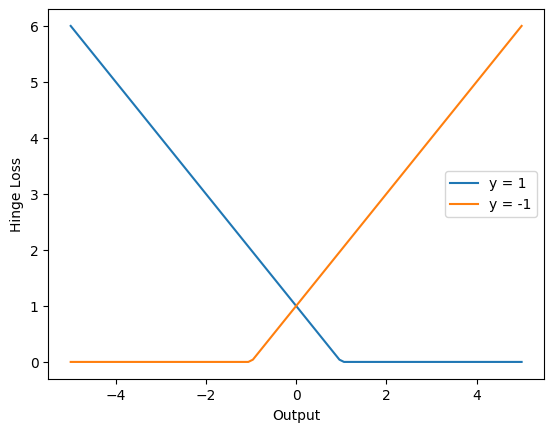

In [ ]:
outputs = torch.linspace(-5,5,100)
positives = torch.ones_like(outputs)
negatives = -1 * torch.ones_like(outputs)

positive = [hinge_loss(outputs[i], positives[i]) for i in range(len(positives))]
negative = [hinge_loss(outputs[i], negatives[i]) for i in range(len(negatives))]

plt.plot(outputs, positive)
plt.plot(outputs, negative)

plt.ylabel('Hinge Loss')
plt.xlabel('Output')

plt.legend(['y = 1', 'y = -1'])

plt.show()

### Exemplo de Classificação

Neste exemplo, vamos classificar flores Iris.
Para isto, vamos utilizar como representação um _perceptron_ multicamadas, treinado com o algoritmo de otimização de **gradiente descendente** para minimizar a função de perda de entropia cruzada categórica.

Para uma melhor avaliação do modelo, vamos utilizar validação cruzada. Utilizaremos uma técnica chamada de _Holdout Cross-validation_, que separa os dados de treino e teste de forma aleatória.

Obs: Ainda não estamos levando em consideração um conjunto de validação, onde podemos controlar o treinamento e realizar _early stopping_.
Veremos isto no futuro.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

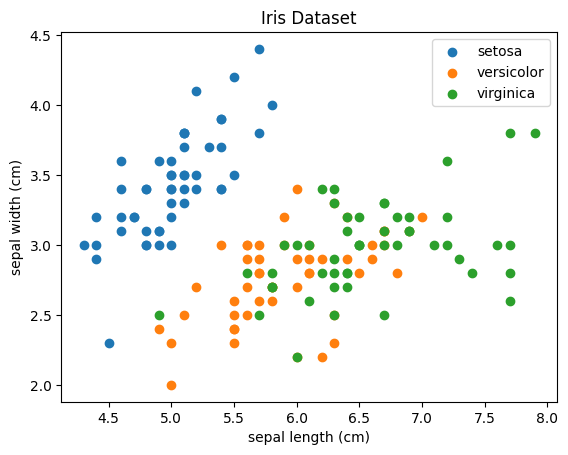

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

for target in np.unique(y):
    plt.scatter(X[y == target,0], X[y == target,1])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names)
plt.title('Iris Dataset')
plt.show()

Preparamos o modelo e a rotina de treinamento conforme os materiais da [Aula 01.A: Fundamentos de Pytorch](https://github.com/vhrique/anne2024/blob/main/01a_Fundamentos_de_Pytorch.ipynb).

Porém, modificamos o modelo para ter quatro entradas e três saídas, conforme o problema que iremos resolver, que possui quatro atributos e três classes.

Para trabalhar com um problema de múltiplas classes, utilizaremos outra função de perda.
No lugar da entropia cruzada binária, focada em problemas de classificação binária, utilizaremos a entropia cruzada categórica.
Além disso, usaremos um algoritmo famoso de otimização, o **gradiente descendente**.

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer = torch.nn.Linear(input_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 3)

    def forward(self, x):
        x = torch.nn.functional.sigmoid(self.hidden_layer(x))
        return self.output_layer(x)

In [ ]:
model = MLP(4, 10)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

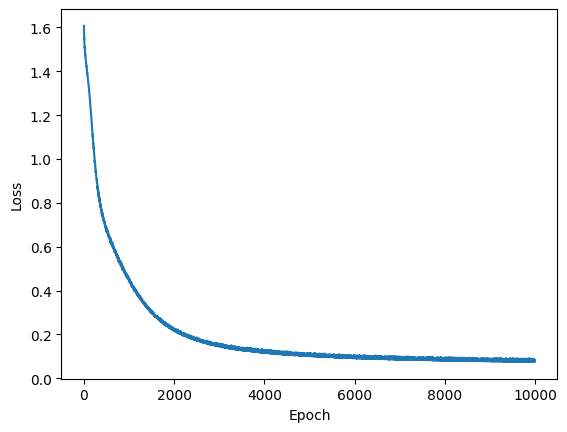

In [ ]:
num_epochs = 10_000
loss_logs = []

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(train_dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Finalizado o treino, vamos analisar o resultado.
Abaixo temos métricas de avaliação de classificação mostrando os resultados para o conjunto de treino. Relembrando, ao avaliar o erro no conjunto de treino, estamos realizando ressubstituição. Vemos nisto uma acurácia alta, de 98%. Também conseguimos verificar a precisão (_precision_) e a sensibilidade (_recall_) para cada classe.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
with torch.no_grad():
    outputs = model(X_train)

print(
    classification_report(
        y_train.detach().numpy(),
        outputs.detach().numpy().argmax(axis=1),
        target_names=iris.target_names
    )
)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        37
  versicolor       0.97      0.97      0.97        40
   virginica       0.98      0.98      0.98        43

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Perceba que, ao avaliar a saída, utilizamos o método _argmax_. O objetivo disto é detectar a classe cuja saída possui maior ativação.

Em seguida, realizamos a avaliação da classificação no conjunto de teste, onde temos amostras que o modelo não viu durante o treino. Aqui, vemos uma acurácia mais baixa, de 98%. Esta diferença entre o conjunto de treino e teste é comum, e é um indicativo da capacidade de generalização do modelo. Nosso objetivo final é generalizar. Portanto, buscamos a maior acurácia possível no conjunto de testes.

Caso criemos um modelo muito complexo e treinemos por muito tempo, corremos um grande risco de realizar _overfitting_ no conjunto de treino. Nesta situação, a capacidade preditiva no conjunto de treino é muito alta. Porém, isto pode vir com um custo de uma capacidade preditiva mais baixa no conjunto de testes.

In [ ]:
with torch.no_grad():
    outputs = model(X_test)

print(
    classification_report(
        y_test.detach().numpy(),
        outputs.detach().numpy().argmax(axis=1),
        target_names=iris.target_names
    )
)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.90      0.95        10
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Neste problema, trabalhamos com uim exemplo de classificação multiclasse. Porém,temos outros tipos. As três principais categorias de classificação são classificação multiclasse, classificação binária e classificação multilabel. Cada uma tem suas próprias características e desafios.

## Regressão

Na regressão, o objetivo é prever um valor contínuo.
Por exemplo, em problemas de previsão de temperatura, o modelo aprende a mapear uma série de variáveis (como pressão e umidade) para prever a temperatura futura.

Ao contrário da classificação, onde as saídas são discretas, a regressão lida com variáveis contínuas.
Portanto, problemas de regressão buscam medir o erro entre os valores diretamente.
Dependendo do nosso objetivo, podemos calcular este erro de diferentes formas.

### Mean Squared Error

O MSE, presente no exemplo anterior, é amplamente usado em problemas de regressão, onde o objetivo é prever valores contínuos.
Ele mede a diferença média entre as predições do modelo e os valores reais, elevando ao quadrado essas diferenças para garantir que erros positivos e negativos não se cancelem.
A fórmula é:

$$
\text{MSE} = \frac{1}{N}\sum_{i=1}^N(y_i - \hat{y}_i)^2
$$

onde $y_i$ é o valor real e $\hat{y}_i$ é a predição do modelo.
O quadrado das diferenças garante que erros grandes tenham um impacto maior no valor final.

- Vantagem: Simples de calcular e amplifica grandes erros.
- Desvantagem: Sensível a outliers, já que erros grandes têm um impacto desproporcional.

Abaixo vemos como utilizar esta função em pytorch e seu resultado.

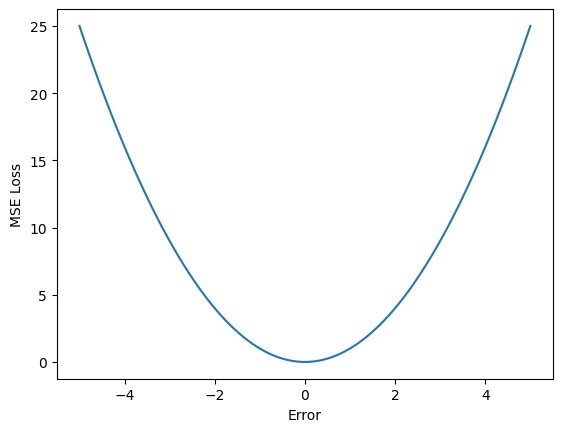

In [ ]:
errors = torch.linspace(-5,5,100)
zeros = torch.zeros_like(errors)

criterion = torch.nn.MSELoss()

mse = [criterion(errors[i], zeros[i]) for i in range(len(errors))]

plt.plot(errors, mse)

plt.ylabel('MSE Loss')
plt.xlabel('Error')

plt.show()

### Mean Absolute Error

O MAE é outra função de perda usada para problemas de regressão, mas, ao contrário do MSE, mede a diferença absoluta média entre os valores previstos e os valores reais.
Sua fórmula é:

$$
\text{MSE} = \frac{1}{N}\sum_{i=1}^N \left|y_i - \hat{y}_i \right|
$$

- Vantagem: Mais robusto a outliers do que o MSE.
- Desvantagem: Não diferencia grandes e pequenos erros da mesma forma que o MSE.

Abaixo vemos sua utilização em pytorch e sua saída.

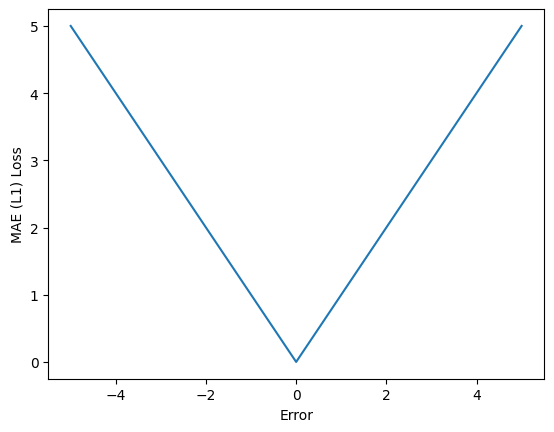

In [ ]:
errors = torch.linspace(-5,5,101)
zeros = torch.zeros_like(errors)

criterion = torch.nn.L1Loss()

mae = [criterion(errors[i], zeros[i]) for i in range(len(errors))]

plt.plot(errors, mae)

plt.ylabel('MAE (L1) Loss')
plt.xlabel('Error')

plt.show()

### Huber Loss

A Huber Loss é uma função de perda que combina as vantagens do Erro Quadrático Médio (MSE) e do Erro Absoluto Médio (MAE), oferecendo uma abordagem robusta para problemas de regressão, especialmente na presença de outliers.
Ela foi projetada para tratar grandes erros de forma mais eficiente do que o MSE, que é altamente sensível a outliers, enquanto mantém a simplicidade do MAE em regiões de pequenos erros.
A fórmula da Huber Loss é definida de forma diferente para erros pequenos e grandes:

$$
L_{\delta}(y_i, \hat{y}_i) =
\begin{cases}
\frac{1}{2}(y_i - \hat{y}_i)^2 & \text{se } |y_i - \hat{y}_i| \leq \delta \\
\delta \cdot (|y_i - \hat{y}_i| - \frac{1}{2} \delta) & \text{se } |y_i - \hat{y}_i| > \delta
\end{cases}
$$

onde $y_i$ é o valor real, $\hat{y}_i$ é a previsão do modelo e $\delta$ é um parâmetro que define o limite entre erros pequenos e grandes.

A Huber Loss funciona de forma suave em relação a pequenos erros, como o MSE, mas trata erros grandes de maneira mais robusta, como o MAE.
Isso faz com que seja uma função intermediária que lida bem tanto com ruídos pequenos quanto com outliers, sendo especialmente útil em problemas de regressão.

Vantagens:

- Robustez a outliers: Quando há grandes erros ou outliers, a Huber Loss não amplifica esses erros tanto quanto o MSE, evitando que um pequeno número de outliers distorça significativamente o modelo.
- Suavidade em pequenos erros: Para erros pequenos, a Huber Loss se comporta como o MSE, permitindo que a função de perda seja diferenciável e suave, o que facilita a otimização.

Desvantagens:

- Escolha de $\delta$: O valor de
$\delta$ deve ser escolhido cuidadosamente, pois um valor mal ajustado pode levar a um comportamento inadequado da função de perda. Sefor muito pequeno, o modelo se comportará quase como o MAE, e se for muito grande, se aproximará do MSE, perdendo as vantagens da robustez

A Huber Loss é amplamente utilizada em problemas de regressão onde há a presença de outliers nos dados, pois oferece um equilíbrio entre ser suave para erros pequenos e robusta para grandes erros. Além disso, é preferida em aplicações de machine learning onde o MSE tende a ser excessivamente influenciado por grandes outliers.

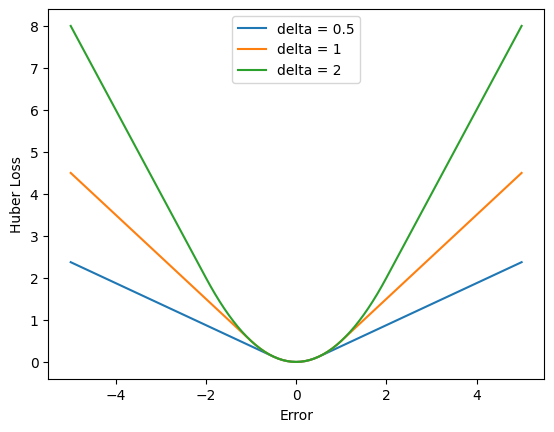

In [ ]:
errors = torch.linspace(-5,5,101)
zeros = torch.zeros_like(errors)

for delta in [0.5, 1, 2]:
    criterion = torch.nn.HuberLoss(delta=delta)
    huber = [criterion(errors[i], zeros[i]) for i in range(len(errors))]
    plt.plot(errors, huber)

plt.ylabel('Huber Loss')
plt.xlabel('Error')

plt.legend(['delta = 0.5', 'delta = 1', 'delta = 2'])

plt.show()

### Exemplo para Regressão

Vejamos um exemplo relacionado à detecção de diabetes.
Aqui, também utilizaremos um _perceptron_ multicamadas.
Diferente do exemplo anterior, temos apenas o número de saídas e a função de perda utilizada, com foco em regressão. Para acelerar o treinamento, também utilizaremos um algoritmo de otimização mais avançado.



In [ ]:
from sklearn.datasets import load_iris, load_diabetes

In [ ]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_mean = X_train.mean(axis=0)
y_mean = y_train.mean(axis=0)

x_std = X_train.std(axis=0)
y_std = y_train.std(axis=0)

X_train = (X_train - x_mean)/x_std
y_train = (y_train - y_mean)/y_std

X_test = (X_test - x_mean)/x_std
y_test = (y_test - y_mean)/y_std

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Vamos aqui adicionar uma nova camada oculta ao modelo, com o objetivo de extrair mais atributos dos sinais de entrada com a rede neural.

Ainda para isto, definiremos como função de perda o erro quadrático médio (mean squared error), e usaremos o algoritmo de otimização ADAM.

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden_layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden_layer1(x))
        x = torch.nn.functional.relu(self.hidden_layer2(x))
        return self.output_layer(x)

In [ ]:
model = MLP(10, 10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

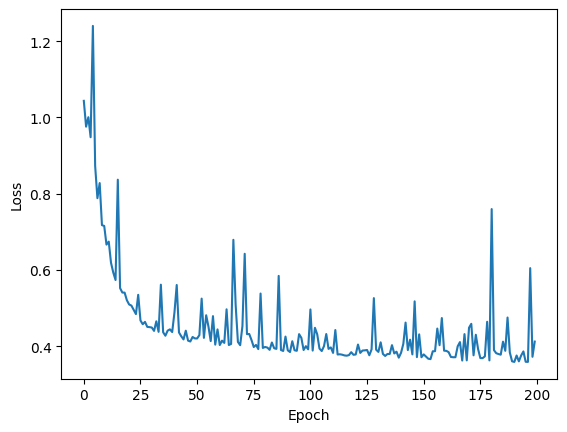

In [ ]:
num_epochs = 200
loss_logs = []

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(train_dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Após o treino, analisamos o resultado por resubstituição. Neste exemplo, estamos analisando a raiz do erro quadrático médio (_root mean squared error_), uma métrica comum em problemas de regressão.

Também plotamos o gráfico de regressão, que indica qual a previsão do modelo no eixo vertical para os valores esperados no eixo horizontal. Quanto melhor as previsões, mais próximos da linha diagonal preta estarão os pontos azuis das amostras.

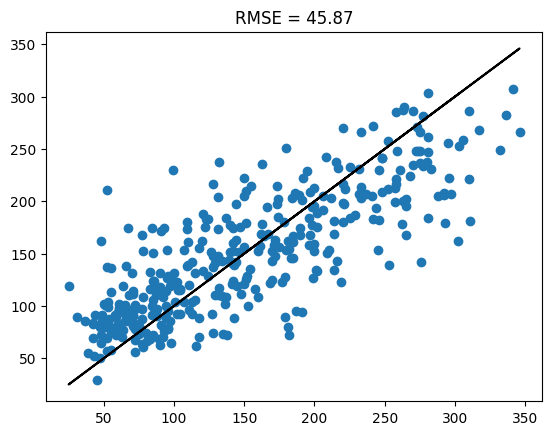

In [ ]:
with torch.no_grad():
    outputs = model(X_train)
    y_train_real = y_train * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_train_real, outputs_real)
plt.plot(y_train_real, y_train_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_train_real).item()):.2f}')
plt.show()

Analisamos, por fim, os resultados no conjunto de teste, mostrando um RMSE um pouco pior que o do conjunto de treino.

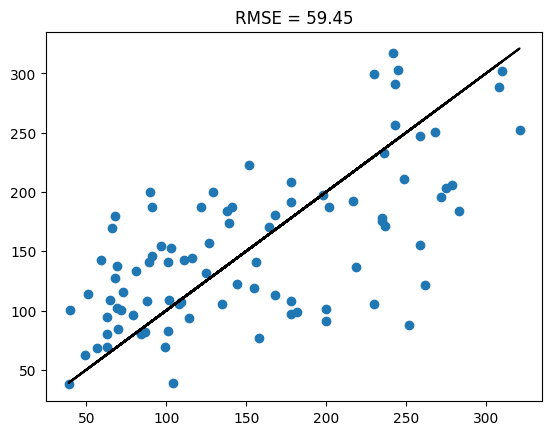

In [ ]:
with torch.no_grad():
    outputs = model(X_test)
    y_test_real = y_test * y_std + y_mean
    outputs_real = outputs * y_std + y_mean

plt.scatter(y_test_real, outputs_real)
plt.plot(y_test_real, y_test_real, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs_real, y_test_real).item()):.2f}')
plt.show()

## Outras Funções de Perda

Além das funções de perda detalhadas anteriormente para classificação e regressão, temos diversos outros exemplos, amplamente utilizados na indústria e na academia.

A **KL Divergence** é utilizada para medir a diferença entre duas distribuições de probabilidade, sendo particularmente útil em modelos probabilísticos, como variational autoencoders (VAEs).
Ela não é propriamente uma função de perda no sentido tradicional, mas é amplamente usada para regularizar a distribuição de saída de um modelo para que seja similar a uma distribuição-alvo.

A **Cosine Similarity Loss** mede o ângulo entre dois vetores, sendo usada para comparar a similaridade entre vetores em vez de medir a diferença absoluta.
Isso é especialmente útil em problemas de aprendizado de representações, como em redes neurais siamesas e embedding learning.

A **Focal Loss** foi introduzida para tratar o problema de desbalanceamento de classes, em que algumas classes são muito mais representadas que outras.
Ela é uma modificação da entropia cruzada que coloca mais peso nas amostras difíceis (ou seja, aquelas que são classificadas de forma incorreta).

Também chamada de **Huber Loss**, mas com uma implementação ligeiramente diferente, a **Smooth L1 Loss** é amplamente utilizada em redes neurais para detecção de objetos. Ela é mais robusta a outliers do que a MSE e mais estável do que o MAE.

A **Dice Loss** é uma função de perda comumente usada em problemas de segmentação de imagens, especialmente em áreas médicas, onde é necessário calcular a sobreposição entre a área predita e a área verdadeira.
É derivada do coeficiente de Dice, que mede a similaridade entre dois conjuntos.

A **Triplet Loss** é usada para aprendizado de embeddings e aprendizado métrico, particularmente em redes siamesas.
A função de perda incentiva a rede a reduzir a distância entre embeddings de amostras semelhantes (o ancor e o positivo) e aumentar a distância entre o ancor e amostras dissimilares (o negativo).

A **Wing Loss** é uma função de perda desenhada especificamente para problemas de detecção de landmarks faciais, onde pequenos erros precisam ser suavemente penalizados, mas grandes erros devem ser penalizados de forma mais forte.

# Considerações Finais

Neste capítulo, abordamos problemas de regressão e classificação utilizando redes neurais artificiais. Além disso, discutimos diferentes funções de perdas que podemos utilizar quando desenvolvemos nossos modelos.

## Próximo Capítulo

No próximo capítulo, falaremos mais algoritmos de otimização para redes neurais.

# Exercícios

1. Aumente o número de neurônios nos exemplos de classificação e regressão e analise a diferença entre os resultados nos conjuntos de treino e teste. O que ocorreu?
2. Comparar BCELoss e Hinge Loss para o problema linear do Capítulo 01, plotando o resultado. O que é possível verificar de diferença?

# Referências

- Domingos, P. (2012). A few useful things to know about machine learning. Communications of the ACM, 55(10), 78-87.
- Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of eugenics, 7(2), 179-188.
- Efron, B., Hastie, T., Johnstone, I., & Tibshirani, R. (2004). Least angle regression.